## Azure Anomaly Detector で異常検知（一変量）

In [ ]:
import os
from azure.ai.anomalydetector import AnomalyDetectorClient
from azure.ai.anomalydetector.models import DetectRequest, TimeSeriesPoint, TimeGranularity, \
    AnomalyDetectorError
from azure.core.credentials import AzureKeyCredential
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [113]:
SUBSCRIPTION_KEY          = "xxx" #　Anomaly Detector の "キーとエンドポイント" の キー の文字列を貼り付け
ANOMALY_DETECTOR_ENDPOINT = "xxx" # Anomaly Detector の "キーとエンドポイント" の エンドポイント の文字列を貼り付け

## データ読み込み（アイスクリームの売上）

In [114]:
data = pd.read_csv(
            "https://okumuralab.org/~okumura/stat/data/icecream.csv", 
            encoding="shift-jis",
            header=1
)

## 前処理

In [115]:
# 年と月を連結
data["年月"] = data["年"].astype(str).str.cat(data["月"].astype(str), sep='-')

# datetime型に変換　（UTC）
data["年月"] = pd.to_datetime(
                    data["年月"],
)

## グラフ表示

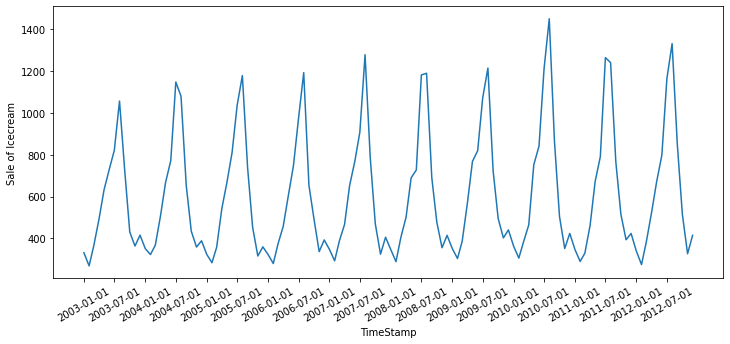

In [133]:
plt.figure(figsize=(12, 5))

plt.plot(
    data["年月"],
    data["アイスクリーム"]
);

plt.xlabel("TimeStamp")
plt.ylabel("Sale of Icecream")

plt.xticks(
    [x for i, x in enumerate(data["年月"]) if i % 6 == 0],
    rotation=30
);

In [117]:
client = AnomalyDetectorClient(AzureKeyCredential(SUBSCRIPTION_KEY), ANOMALY_DETECTOR_ENDPOINT)

In [118]:
series = []

for index, row in data.iterrows():
    series.append(TimeSeriesPoint(timestamp=row[3], value=row[2]))

In [119]:
request = DetectRequest(series=series, granularity=TimeGranularity.daily)

## データセット全体で異常検出

In [121]:
print('Detecting anomalies in the entire time series.')

anomaly_index_list = []

try:
    response = client.detect_entire_series(request);
except AnomalyDetectorError as e:
    print('Error code: {}'.format(e.error.code), 'Error message: {}'.format(e.error.message))
except Exception as e:
    print(e)

if any(response.is_anomaly):
    print('An anomaly was detected at index:')
    for i, value in enumerate(response.is_anomaly):
        if value:
            print(i)
            anomaly_index_list.append(i)
else:
    print('No anomalies were detected in the time series.')

Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be considered UTC.
Datetime with no tzinfo will be consider

Detecting anomalies in the entire time series.
An anomaly was detected at index:
7
18
19
30
31
42
43
55
66
67
78
79
90
91
102
103
114
115


## 異常点をマーキングしてグラフ表示

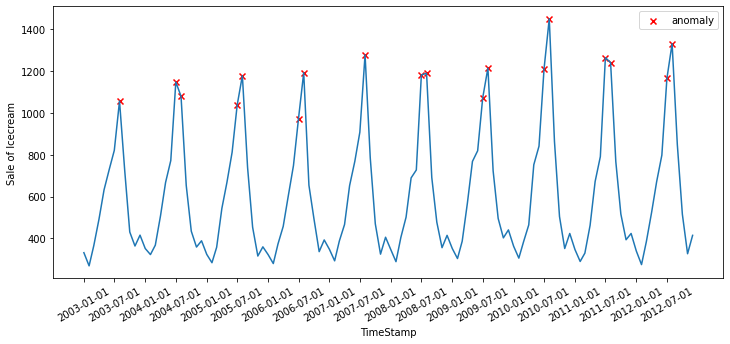

In [132]:
plt.figure(figsize=(12, 5))

plt.plot(
    data["年月"],
    data["アイスクリーム"]
);

# 異常点をマーカーで表示
plt.scatter(
    data.iloc[anomaly_index_list]["年月"],
    data.iloc[anomaly_index_list]["アイスクリーム"],
    c="red",
    marker="x",
    label="anomaly"
)

plt.xticks(
    [x for i, x in enumerate(data["年月"]) if i % 6 == 0],
    rotation=30
);

plt.xlabel("TimeStamp")
plt.ylabel("Sale of Icecream")

plt.legend()